In [1]:
import os
import datetime

import IPython
import IPython.display
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Normalization, BatchNormalization
from sklearn.model_selection import train_test_split

In [2]:
path = 'postureData/'
filesList = os.listdir(path)
print(filesList)

## Accelerometer, Gyroscope, Magnetometer Limits which will be used to scale data
imuMin = [-4, -2000, -400]
imuMax = [4, 2000, 400]

['1_supine.csv', '2_prone.csv', '3_leftSide.csv', '3_rightSide.csv', '4_sittingSensorDown.csv', '4_sittingSensorUp.csv', '5_unknown.csv']


In [3]:
i = 0
j = 0
labels = np.zeros((5*64*3), dtype=int)
dataList = np.zeros((5*64*3,25,3))

while i < len(filesList):
# while i<1:
  x_dir, y_dir, z_dir = [], [], []
  
  # Reads CSV file and convert into pandas dataframe
  poseData = pd.read_csv(path + filesList[i])

  # If CSV file is for side or sitting then truncate it till 800 values and concatenate it with the next csv file
  if len(poseData['Acc_X']) < 900:
    poseData = poseData.iloc[0:800]
    i+=1
    dfTemp = pd.read_csv(path + filesList[i])
    dfTemp = dfTemp.iloc[0:800]
    poseData = pd.concat([poseData, dfTemp])
    poseData = poseData.reset_index(drop=True)

  # Else just truncates CSV file till 1600 values
  else:
    poseData = poseData.iloc[0:1600]

  ## This scales data between 0 to 1 according to the output limits of the IMU sensors ##
  columnList = poseData.columns
  # for k in range(0,7,3):
  #   for l in range(3):
  #     poseData[columnList[k+l]] = (poseData[columnList[k+l]] - imuMin[int(k/3)])/(imuMax[int(k/3)]-imuMin[int(k/3)])

  ## takes first 64*3 labels and add them to labels list
  labels[j:j+64*3] = poseData['Posture'].iloc[0:64*3].to_numpy()

  poseData = poseData.drop(['Posture'], axis=1)
  # print(poseData[columnList[1]])

  for m in range(0,7,3):
    x_dir.extend(poseData[columnList[m]].tolist())
    y_dir.extend(poseData[columnList[m+1]].tolist())
    z_dir.extend(poseData[columnList[m+2]].tolist())
  xyz = np.array([x_dir,y_dir,z_dir]).transpose().reshape([64*3,25,3])
  # print(xyz)
  dataList[j:j+64*3] = xyz

  i += 1
  j += 64*3

# xyz.shape
dataList.shape

(960, 25, 3)

In [4]:
# TO CHECK IF DATA IS STORED IN CORRECT WAY IN NUMPY ARRAY
print(dataList[64*3:64*3*2]) # Should correspond to Prone data
# print(xyz)
print()
print(labels[64*3:64*3*2]) # Should be 2
print()
print("HELLO")
print()
pd.read_csv(path + filesList[1])[0:1600] # Reads Prone Data


[[[-6.000e-02  0.000e+00 -1.000e+00]
  [-5.000e-02 -0.000e+00 -1.010e+00]
  [-6.000e-02 -0.000e+00 -1.000e+00]
  ...
  [ 1.000e-02 -1.000e-02 -1.010e+00]
  [ 4.000e-02 -0.000e+00 -1.010e+00]
  [-3.000e-02  2.000e-02 -1.010e+00]]

 [[-1.000e-02  2.000e-02 -1.010e+00]
  [-1.000e-02  3.000e-02 -1.000e+00]
  [-3.000e-02  4.000e-02 -1.020e+00]
  ...
  [-3.000e-02  1.000e-02 -1.030e+00]
  [-1.000e-02 -0.000e+00 -1.020e+00]
  [-1.000e-02  0.000e+00 -9.900e-01]]

 [[-1.000e-02 -0.000e+00 -9.900e-01]
  [-3.000e-02 -1.000e-02 -1.010e+00]
  [-2.000e-02 -0.000e+00 -1.000e+00]
  ...
  [ 2.000e-02  2.000e-02 -1.030e+00]
  [ 3.000e-02  2.000e-02 -9.600e-01]
  [-1.000e-02  1.000e-02 -1.000e+00]]

 ...

 [[-1.451e+01  2.274e+01  4.989e+01]
  [-1.699e+01  1.844e+01  4.902e+01]
  [-1.738e+01  1.799e+01  4.872e+01]
  ...
  [-1.084e+01 -1.140e+00  4.709e+01]
  [-1.027e+01 -2.660e+00  4.752e+01]
  [-1.049e+01 -3.390e+00  4.772e+01]]

 [[-1.176e+01 -3.630e+00  4.724e+01]
  [-1.154e+01 -2.110e+00  4.764e+01]


,Acc_X,Acc_Y,Acc_Z,Gyr_X,Gyr_Y,Gyr_Z,Mag_X,Mag_Y,Mag_Z,Posture
0,-0.06,0.00,-1.00,-0.18,-0.31,-0.24,36.61,17.32,23.71,2
1,-0.05,-0.00,-1.01,-0.31,-0.18,-0.06,36.50,17.55,24.84,2
2,-0.06,-0.00,-1.00,-0.06,-0.31,-0.06,36.80,16.92,24.22,2
3,-0.06,-0.00,-1.00,-0.31,-0.24,-0.18,36.63,17.03,23.49,2
4,-0.06,-0.00,-1.00,-0.18,-0.37,-0.24,36.84,17.00,24.29,2
...,...,...,...,...,...,...,...,...,...,...
1595,0.12,0.00,-0.97,3.48,-1.59,-3.11,23.62,-3.82,42.10,2
1596,0.15,-0.02,-1.01,-12.15,-3.60,-7.75,25.24,-3.61,41.77,2
1597,0.11,-0.05,-0.97,4.70,10.38,-9.40,24.82,-3.37,42.29,2
1598,0.09,-0.00,-1.02,14.34,26.31,0.43,24.19,-3.21,42.11,2


In [5]:
dataList = np.expand_dims(dataList, axis=3) # Expands one dimension due to input restriction of the model.
labels = labels - 1 # Because for sparse_categorical_entropy labels start from 0 i.e. Index
# print(labels)

# Split data into training, testing and validation datasets
# Train = 70% , Valid = 15%, Test = 15%
X_train, x_temp, Y_train, y_temp = train_test_split(dataList, labels, test_size=0.2, shuffle=True, random_state=23)
X_val, x_test, Y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=23)

print(X_train.shape)
print(X_val.shape)
print(x_test.shape)
print()
print(Y_train.shape)
print(Y_val.shape)
print(y_test.shape)

# Convert it into TensorFlow Dataset according to the batch size
batchSize = 32

trainDataset = tf.data.Dataset.from_tensor_slices((X_train, Y_train)).batch(batchSize)
validDataset = tf.data.Dataset.from_tensor_slices((X_val, Y_val)).batch(batchSize)
testDataset = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(batchSize)


(768, 25, 3, 1)
(96, 25, 3, 1)
(96, 25, 3, 1)

(768,)
(96,)
(96,)


In [6]:
## Builds convolutional model
def cnnModelCreator():
  # Define the model
  model = Sequential([
      Normalization(axis=-1, input_shape=(25, 3, 1)),
      Conv2D(32, kernel_size=(8,2),strides = (4,1), activation = 'relu'),
      Conv2D(32, kernel_size=(1,2),strides = (1,1), activation = 'relu'),     
      MaxPooling2D((2,1)),
      Flatten(),
      Dense(32, activation = 'sigmoid'),
      Dropout(0.5),
      BatchNormalization(),
      Dense(16, activation = 'relu'),
      Dropout(0.4),
      Dense(5, activation = 'softmax')
  ])

  model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

  return model


In [7]:

# Defining early stopping callback
early_stopping_callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=25,  # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True
)

In [8]:
model_1 = cnnModelCreator()
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizati  (None, 25, 3, 1)          3         
 on)                                                             
                                                                 
 conv2d (Conv2D)             (None, 5, 2, 32)          544       
                                                                 
 conv2d_1 (Conv2D)           (None, 5, 1, 32)          2080      
                                                                 
 max_pooling2d (MaxPooling2  (None, 2, 1, 32)          0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 32)                2

In [9]:
epochs = 500
history = model_1.fit(trainDataset, epochs=epochs, validation_data= validDataset, callbacks=[early_stopping_callback])

Epoch 1/500
24/24 [==============================] - 2s 23ms/step - loss: 2.0405 - accuracy: 0.2305 - val_loss: 1.5997 - val_accuracy: 0.2083
Epoch 2/500
24/24 [==============================] - 0s 4ms/step - loss: 1.8926 - accuracy: 0.2513 - val_loss: 1.5428 - val_accuracy: 0.2396
Epoch 3/500
24/24 [==============================] - 0s 4ms/step - loss: 1.7432 - accuracy: 0.2643 - val_loss: 1.4952 - val_accuracy: 0.3438
Epoch 4/500
24/24 [==============================] - 0s 4ms/step - loss: 1.6943 - accuracy: 0.2956 - val_loss: 1.4657 - val_accuracy: 0.3958
Epoch 5/500
24/24 [==============================] - 0s 4ms/step - loss: 1.6266 - accuracy: 0.3099 - val_loss: 1.4125 - val_accuracy: 0.5000
Epoch 6/500
24/24 [==============================] - 0s 4ms/step - loss: 1.5463 - accuracy: 0.3398 - val_loss: 1.3605 - val_accuracy: 0.4583
Epoch 7/500
24/24 [==============================] - 0s 4ms/step - loss: 1.5254 - accuracy: 0.3542 - val_loss: 1.3126 - val_accuracy: 0.5417
Epoch 8/500


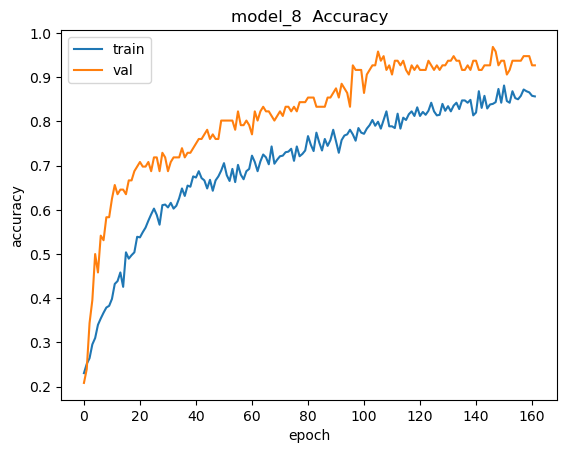

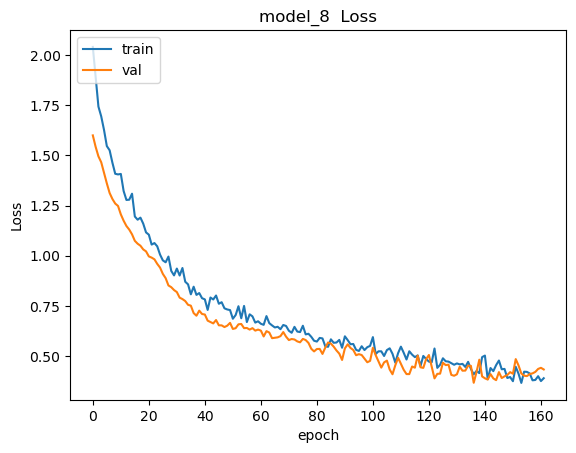

In [10]:
# plt.figure(figsize=(20, 10))
# activations = ['relu', 'sigmoid', 'tanh']
# for i in range(3):
# plt.subplot(2,3,i+1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model_'+ str(i+1) + ' ' + ' Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# plt.subplot(2,3,i+4)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model_'+ str(i+1)  + ' ' + ' Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [16]:
## How Predictions are outputted?
score = model_1.evaluate(x_test,y_test)

3/3 [==============================] - 0s 8ms/step - loss: 0.2983 - accuracy: 0.9062


In [15]:
# model_1.save(r'C:\Users\shubh\EmbeddedML\Miniprojects\mp4\xyzModel')

INFO:tensorflow:Assets written to: C:\Users\shubh\EmbeddedML\Miniprojects\mp4\xyzModel\assets


INFO:tensorflow:Assets written to: C:\Users\shubh\EmbeddedML\Miniprojects\mp4\xyzModel\assets
